## Sales Analysis

In [63]:
### Import Necessary Libraries
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import calendar
from collections import Counter
from itertools import combinations
import numpy as np

### Task 1: print 12 months of sales data (Read all files from directory)

In [64]:
files = [file for file in os.listdir(r"C:\Users\yarde\OneDrive\שולחן העבודה\Projects\SalesAnalysis\Sales_Data")]
for file in files:
    print(file)

Sales_April_2019.csv
Sales_August_2019.csv
Sales_December_2019.csv
Sales_February_2019.csv
Sales_January_2019.csv
Sales_July_2019.csv
Sales_June_2019.csv
Sales_March_2019.csv
Sales_May_2019.csv
Sales_November_2019.csv
Sales_October_2019.csv
Sales_September_2019.csv


In [65]:
df = pd.read_csv(r"C:\Users\yarde\OneDrive\שולחן העבודה\Projects\SalesAnalysis\Sales_Data\Sales_April_2019.csv")

### Task 2: Merging 12 months of sales data into a single file (Read all files from directory)

In [66]:
all_months_data = pd.DataFrame()  # Initialize an empty DataFrame
for file in files:
    file_path = r"C:\Users\yarde\OneDrive\שולחן העבודה\Projects\SalesAnalysis\Sales_Data\\" + file
    df = pd.read_csv(file_path)
    all_months_data = pd.concat([all_months_data, df])

#check that it worked, index=False so index labels are not included in the new CSV file I made.
all_months_data.to_csv("all_data.csv", index=False)

data = pd.read_csv("all_data.csv")

# Clean data
nan_rows = data.isna().sum()
data.dropna(how='all', inplace=True)

data = data[data['Order Date'] != 'Order Date']

data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


### Task 3: Best month for sales and how much wad earned

In [67]:
#motnh column column
data["Order Date"] = pd.to_datetime(data["Order Date"], format='%m/%d/%y %H:%M')
data['Month'] = data["Order Date"].dt.month
data["Month"] = data["Month"].astype('int32')

#change type from object to numeric (int/float)
data['Quantity Ordered'] = pd.to_numeric(data['Quantity Ordered'])
data['Price Each'] = pd.to_numeric(data['Price Each'])
data['Sales'] = data['Quantity Ordered'] * data['Price Each']

data.groupby('Month')['Sales'].sum().sort_values(ascending=False)

Month
12    4613443.34
10    3736726.88
4     3390670.24
11    3199603.20
5     3152606.75
3     2807100.38
7     2647775.76
6     2577802.26
8     2244467.88
2     2202022.42
9     2097560.13
1     1822256.73
Name: Sales, dtype: float64

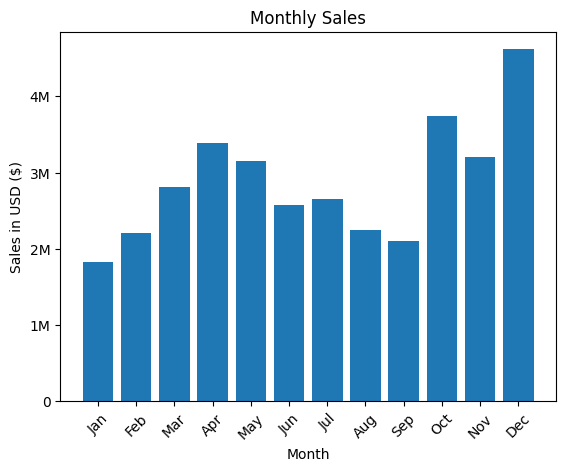

In [68]:
result = data.groupby('Month')['Sales'].sum()
plt.bar(range(1,13), result)
plt.ticklabel_format(scilimits=(-5, 8))

# Adding labels and title
plt.xticks(range(1,13))
plt.xlabel('Month')
plt.ylabel('Sales in USD ($)')
plt.title('Monthly Sales')
plt.yticks([0,1000000,2000000,3000000,4000000],['0','1M', '2M','3M','4M'])  
month_abbr = list(calendar.month_abbr)[1:] 
plt.xticks(range(1,13),list(calendar.month_abbr)[1:])
plt.xticks(rotation=45)
# Displaying the plot
plt.show()

### Task 4: City with highest sales

In [69]:
data['City'] = data["Purchase Address"].apply(lambda x: x.split(",")[1] + x.split(",")[2][:3])

data.groupby('City')['Sales'].sum().sort_values(ascending=False)


City
San Francisco CA    8262203.91
Los Angeles CA      5452570.80
New York City NY    4664317.43
Boston MA           3661642.01
Atlanta GA          2795498.58
Dallas TX           2767975.40
Seattle WA          2747755.48
Portland OR         1870732.34
Austin TX           1819581.75
Portland ME          449758.27
Name: Sales, dtype: float64

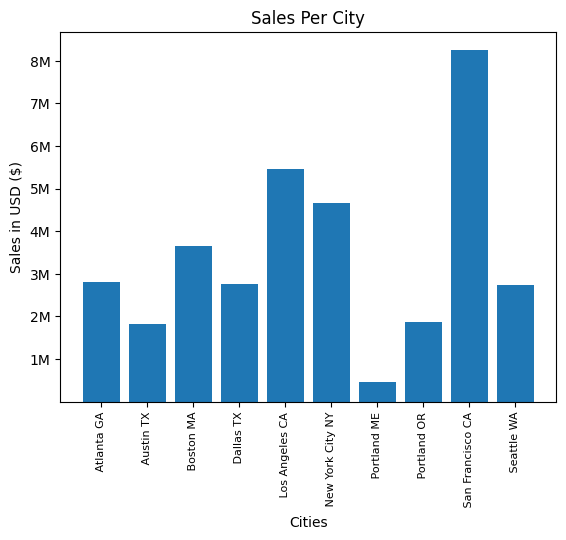

In [70]:
result = data.groupby('City')['Sales'].sum()
cities = [city for city,df in data.groupby('City')]
plt.bar(cities, result)

# # Adding labels and title
plt.xticks(cities)
plt.xlabel('Cities')
plt.ylabel('Sales in USD ($)')
plt.title('Sales Per City')
plt.yticks([i * 1_000_000 for i in range(1, 9)], [f"{i}M" for i in range(1, 9)])
plt.xticks(rotation=90, size=8)
# Displaying the plot
plt.show()

### Task 5: What time should we display advertisment to maximize likelihood of customer's buying product?

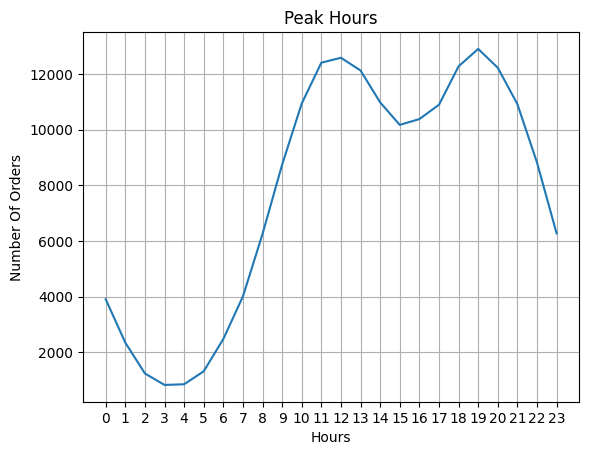

In [71]:
data['Hour'] = data["Order Date"].dt.hour
data['Minute'] = data["Order Date"].dt.minute

hours = [Hour for Hour,df in data.groupby('Hour')]

plt.plot(hours, data.groupby('Hour')['Order ID'].count())
plt.xticks(hours)
plt.grid()
plt.xlabel('Hours')
plt.ylabel('Number Of Orders')
plt.title('Peak Hours')
plt.show()

#Peak around 12:00 and 19:00

### Task 6: What products are often sold together?

In [72]:
#Identify duplicates, False --> keep all
duplicate_orders = data[data.duplicated(subset=['Order ID'], keep=False)]

grouped_products = duplicate_orders.groupby('Order ID')['Product'].apply(list)
print(grouped_products)

Order ID
141275             [USB-C Charging Cable, Wired Headphones]
141290    [Apple Airpods Headphones, AA Batteries (4-pack)]
141365                  [Vareebadd Phone, Wired Headphones]
141384                 [Google Phone, USB-C Charging Cable]
141450           [Google Phone, Bose SoundSport Headphones]
                                ...                        
319536               [Macbook Pro Laptop, Wired Headphones]
319556                     [Google Phone, Wired Headphones]
319584                           [iPhone, Wired Headphones]
319596                   [iPhone, Lightning Charging Cable]
319631    [34in Ultrawide Monitor, Lightning Charging Ca...
Name: Product, Length: 7136, dtype: object


In [73]:
product_combinations = Counter()
for products in grouped_products:
    product_combinations.update(Counter(combinations(products, 2)))

print(product_combinations)

Counter({('iPhone', 'Lightning Charging Cable'): 1005, ('Google Phone', 'USB-C Charging Cable'): 987, ('iPhone', 'Wired Headphones'): 447, ('Google Phone', 'Wired Headphones'): 414, ('Vareebadd Phone', 'USB-C Charging Cable'): 361, ('iPhone', 'Apple Airpods Headphones'): 360, ('Google Phone', 'Bose SoundSport Headphones'): 220, ('USB-C Charging Cable', 'Wired Headphones'): 160, ('Vareebadd Phone', 'Wired Headphones'): 143, ('Lightning Charging Cable', 'Wired Headphones'): 92, ('Lightning Charging Cable', 'Apple Airpods Headphones'): 81, ('Vareebadd Phone', 'Bose SoundSport Headphones'): 80, ('USB-C Charging Cable', 'Bose SoundSport Headphones'): 77, ('Apple Airpods Headphones', 'Wired Headphones'): 69, ('Lightning Charging Cable', 'USB-C Charging Cable'): 58, ('Lightning Charging Cable', 'AA Batteries (4-pack)'): 55, ('Lightning Charging Cable', 'Lightning Charging Cable'): 54, ('Bose SoundSport Headphones', 'Wired Headphones'): 53, ('AA Batteries (4-pack)', 'Lightning Charging Cable')

In [74]:
for combination, count in product_combinations.most_common(10):
    print(combination, count)

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


### Task 7: What product is sold the most?

In [75]:
data.groupby('Product')['Quantity Ordered'].sum().sort_values(ascending=False)

Product
AAA Batteries (4-pack)        31017
AA Batteries (4-pack)         27635
USB-C Charging Cable          23975
Lightning Charging Cable      23217
Wired Headphones              20557
Apple Airpods Headphones      15661
Bose SoundSport Headphones    13457
27in FHD Monitor               7550
iPhone                         6849
27in 4K Gaming Monitor         6244
34in Ultrawide Monitor         6199
Google Phone                   5532
Flatscreen TV                  4819
Macbook Pro Laptop             4728
ThinkPad Laptop                4130
20in Monitor                   4129
Vareebadd Phone                2068
LG Washing Machine              666
LG Dryer                        646
Name: Quantity Ordered, dtype: int64

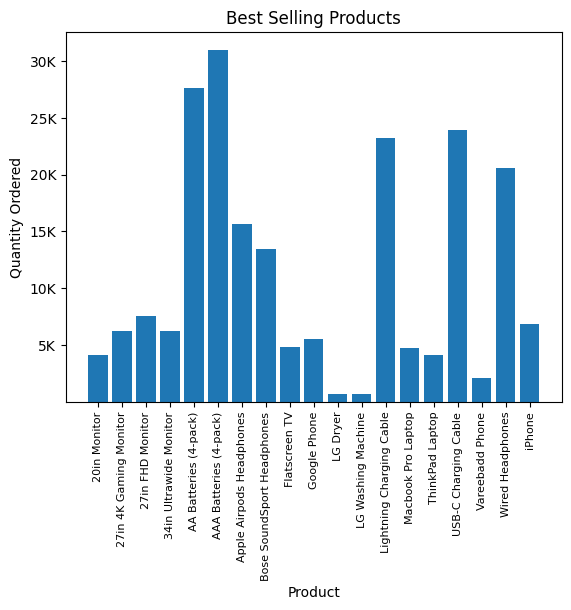

In [76]:
products = [product for product,df in data.groupby('Product')]
plt.bar(products, data.groupby('Product')['Quantity Ordered'].sum())

# # Adding labels and title
plt.xticks(products)
plt.xlabel('Product')
plt.ylabel('Quantity Ordered')
plt.title('Best Selling Products')
plt.yticks(list(np.arange(5000, 30001, 5000)),['5K', '10K', '15K', '20K', '25K', '30K'])
plt.xticks(rotation=90, size=8)
# Displaying the plot
plt.show()

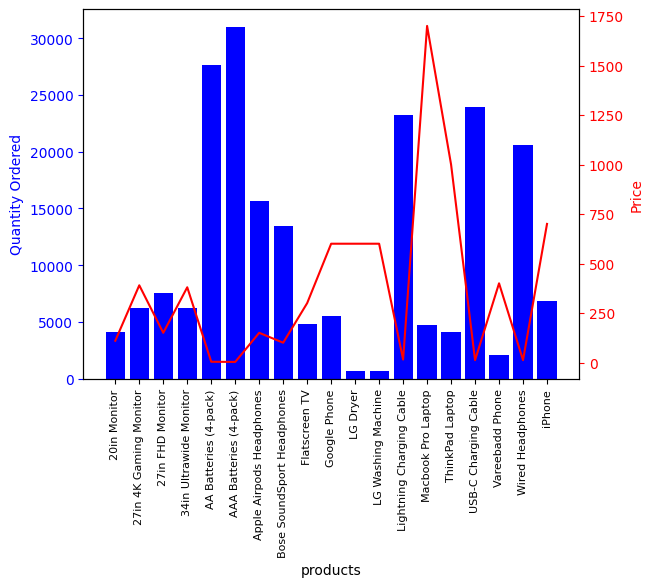

In [81]:
prices = data.groupby('Product')['Price Each'].mean()

fig,ax=plt.subplots()

ax.bar(products,data.groupby('Product')['Quantity Ordered'].sum(),color="blue")
plt.xticks(rotation=90, size=8)
ax.set_xlabel("products")
ax.set_ylabel("Quantity Ordered", color="blue")
ax.tick_params('y', colors="blue")
ax2 = ax.twinx()
ax2.plot(products, prices, color="red")
ax2.set_ylabel("Price", color="red")
ax2.tick_params('y', colors="red")
plt.show()

#People buy more when the price is lower